In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("../..")
from analyzer.dumperReader.reader import *

In [2]:
reader = DumperReader("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/dumper_101.root") #"../runs_results/histo.root:ticlDumper")

In [3]:
assocs_zip_recoToSim(reader.associations).simts_id

<Array [[[0, 1], [0, ...], ..., [0, 1]], ...] type='100 * var * var * uint32'>

In [4]:
ak.to_dataframe(reader.simTrackstersCP)

regressed_energy  raw_energy  barycenter_x  barycenter_y  \
entry subentry                                                             
0     0               260.535889  262.060822     43.388233     -9.003727   
      1               260.535889  265.912811    -40.854183     15.595878   
1     0               233.356415  236.375717     16.516609   -116.074348   
      1               233.356415  233.512634    -15.209192    116.131332   
2     0               239.973526  243.808395     95.294098     31.507908   
...                          ...         ...           ...           ...   
97    1               239.547318  240.925400     40.346405    -44.297031   
98    0               329.190918  336.582977     -9.159848   -101.258446   
      1               329.190918  319.961426      7.929540    102.041672   
99    0               234.995773  235.146133    -42.319241     91.937134   
      1               234.995773  227.163223     40.490250    -94.441696   

                barycenter_z  barycenter_eta  barycenter_phi  
entry subentry                                                
0     0          -333.805603       -2.716815       -0.204611  
      1           335.093597        2.733758        2.776922  
1     0          -334.565704       -1.771104       -1.429452  
      1           335.572937        1.774912        1.701021  
2     0          -332.762024       -1.913738        0.319323  
...                      ...             ...             ...  
97    1           336.988403        2.428045       -0.832038  
98    0          -334.794342       -1.907210       -1.661011  
      1           335.088593        1.901698        1.493243  
99    0          -333.584259       -1.908107        2.002188  
      1           333.471680        1.893287       -1.165768  

[200 rows x 7 columns]

In [5]:
reader.associations.tsCLUE3D_recoToSim_CP_score[reader.associations.tsCLUE3D_recoToSim_CP == 1]

<Array [[[1], [1], [1], ..., [1], [1]], ...] type='100 * var * var * float32'>

In [6]:
ak.flatten(reader.associations.tsCLUE3D_recoToSim_CP, axis=None)

<Array [0, 1, 0, 1, 0, 1, 0, ..., 1, 0, 1, 0, 1, 0, 1] type='695390 * uint32'>

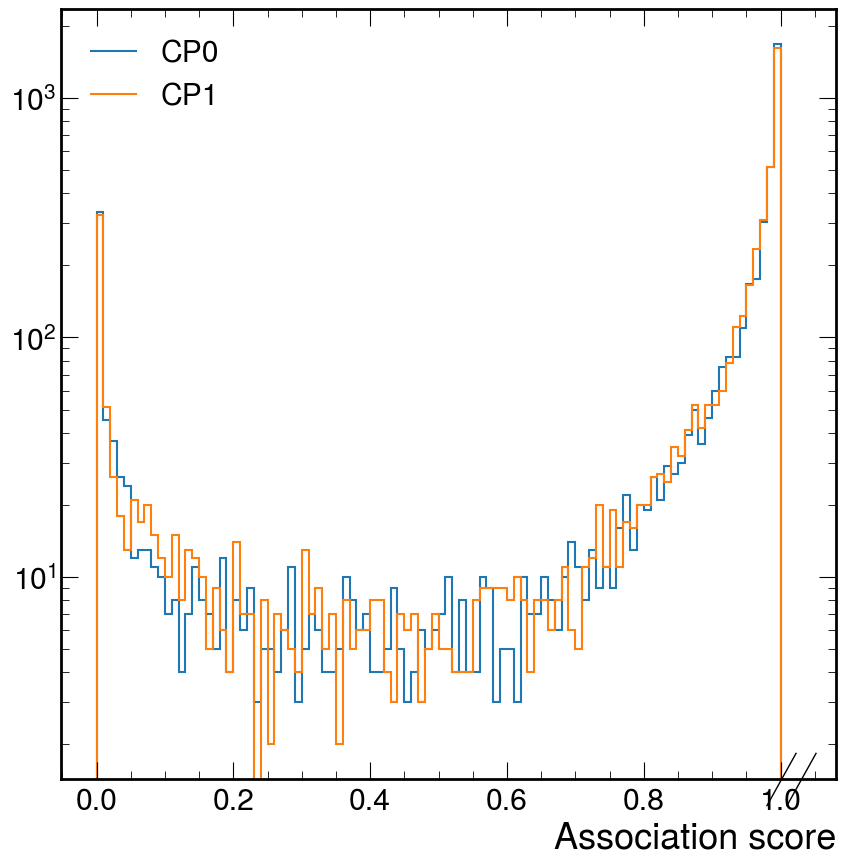

In [7]:
nbins=100
axis = hist.axis.Regular(100, 0, 1, name="score", label="Association score")
h0 = hist.Hist(axis, name="CP0")
h0.fill(ak.flatten(reader.associations.tsCLUE3D_recoToSim_CP_score[reader.associations.tsCLUE3D_recoToSim_CP == 0], axis=None))
h1 = hist.Hist(axis, name="CP1")
h1.fill(ak.flatten(reader.associations.tsCLUE3D_recoToSim_CP_score[reader.associations.tsCLUE3D_recoToSim_CP == 1], axis=None))
hep.histplot([h0, h1], yerr=False, label=["CP0", "CP1"])
plt.yscale("log")
plt.legend()

In [8]:
ak.to_regular(reader.associations.tsCLUE3D_recoToSim_CP_score[ak.any(reader.associations.tsCLUE3D_recoToSim_CP_score < 0.9, axis=-1)][0])

<Array [[0.766, 1], [0.437, 1], ..., [...], [0.473, 1]] type='54 * 2 * float32'>

In [9]:
assocs_zip_simToReco(reader.associations)[0][1]#.simts_id

<Array [{simts_id: 1, ts_id: 2242, ...}, ...] type='3378 * {simts_id: int64...'>

In [10]:
assocs_zip_simToReco(reader.associations)[(assocs_zip_simToReco(reader.associations).simts_id == 1) & (assocs_zip_simToReco(reader.associations).score < 1)]

<Array [[[], [{...}, ..., {...}]], ..., [...]] type='100 * var * var * {sim...'>

In [11]:
ar = assocs_zip_recoToSim(reader.associations)[(assocs_zip_recoToSim(reader.associations).simts_id == 1) & (assocs_zip_recoToSim(reader.associations).score < 0.9)]
ar[ak.num(ar, axis=-1) > 0]

<Array [[[{ts_id: 1728, ...}], ...], ...] type='100 * var * var * {ts_id: i...'>

In [12]:
assocs_zip_recoToSim(reader.associations)[0][1728]

<Array [{ts_id: 1728, simts_id: 1, ...}, ...] type='2 * {ts_id: int64, simt...'>

In [13]:
reader.superclusters

<Array [[[558, 89], ..., [2809, ...]], ...] type='100 * var * var * uint64'>

In [14]:
tracksters_getSeeds(reader.tracksters_zipped)

<Array [[{ts_id: 1657, ...}, {...}], ...] type='100 * var * tracksters[ts_i...'>